
# Game Engagement Analysis Project

**KPIs to Decode Player Behaviour and Growth- Funnel metrics**
- Regional performance
- Retention analysis
- Forecasting

Each section includes:
- Code for analysis
- Visualizations
- Conclusions


## Step 1: Load Data

Data Load, Observed, Cleaned and prepared in previous steps in different file

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
data_files = {
    
    "Crashes": "Hot air Baloon/Crashes.csv",
    "Deletion": "Hot air Baloon/Deletion.csv",
    "Download_Region": "Hot air Baloon/Download_Regions.csv",
    "Impression": "Hot air Baloon/Impression.csv",
    "Installation": "Hot air Baloon/Installation.csv",
    "Page_Type": "Hot air Baloon/Page_Type.csv",
    "Product_PageViews": "Hot air Baloon/Product_PageViews.csv",
    "Session": "Hot air Baloon/Session.csv",
    "Total_Downloads": "Hot air Baloon/Total Downloads.csv",
    "Active_Devices": "Hot air Baloon/Active Devices.csv",
    "Conversion_Rate": "Hot air Baloon/Conversion Rate.csv",
    "Download_Source" : "Hot air Baloon/Downloads_Source.csv",
    "Download_iOSVersion": "Hot air Baloon/formatted_downloads_data.csv"
    

}
dataframes = {name: pd.read_csv(path) for name, path in data_files.items()}
for name, df in dataframes.items():
    print(f"Dataset: {name}\n", df.head(), "\n")


Dataset: Crashes
       Date  Crashes
0  10/1/19        0
1  11/1/19        0
2  12/1/19        0
3   1/1/20        0
4   2/1/20        0 

Dataset: Deletion
       Date  Deletions
0  10/1/19          0
1  11/1/19          2
2  12/1/19          1
3   1/1/20          2
4   2/1/20          3 

Dataset: Download_Region
          Date                              Region  Downloads
0  2019-10-01  Africa, The Middle East, and India          1
1  2019-11-01  Africa, The Middle East, and India          1
2  2019-12-01  Africa, The Middle East, and India          1
3  2020-01-01  Africa, The Middle East, and India          2
4  2020-02-01  Africa, The Middle East, and India          2 

Dataset: Impression
       Date  Impressions
0  10/1/19         2909
1  11/1/19         9209
2  12/1/19         6356
3   1/1/20         7186
4   2/1/20         7107 

Dataset: Installation
       Date  Installations
0  10/1/19              0
1  11/1/19              2
2  12/1/19              1
3   1/1/20         

**Conclusion**: All datasets have been successfully loaded.

## Phase 2: Conversion Funnel Analysis

**Goal:**

Analyze the conversion funnel from impressions to installs

### Step 1: Conversion Analysis

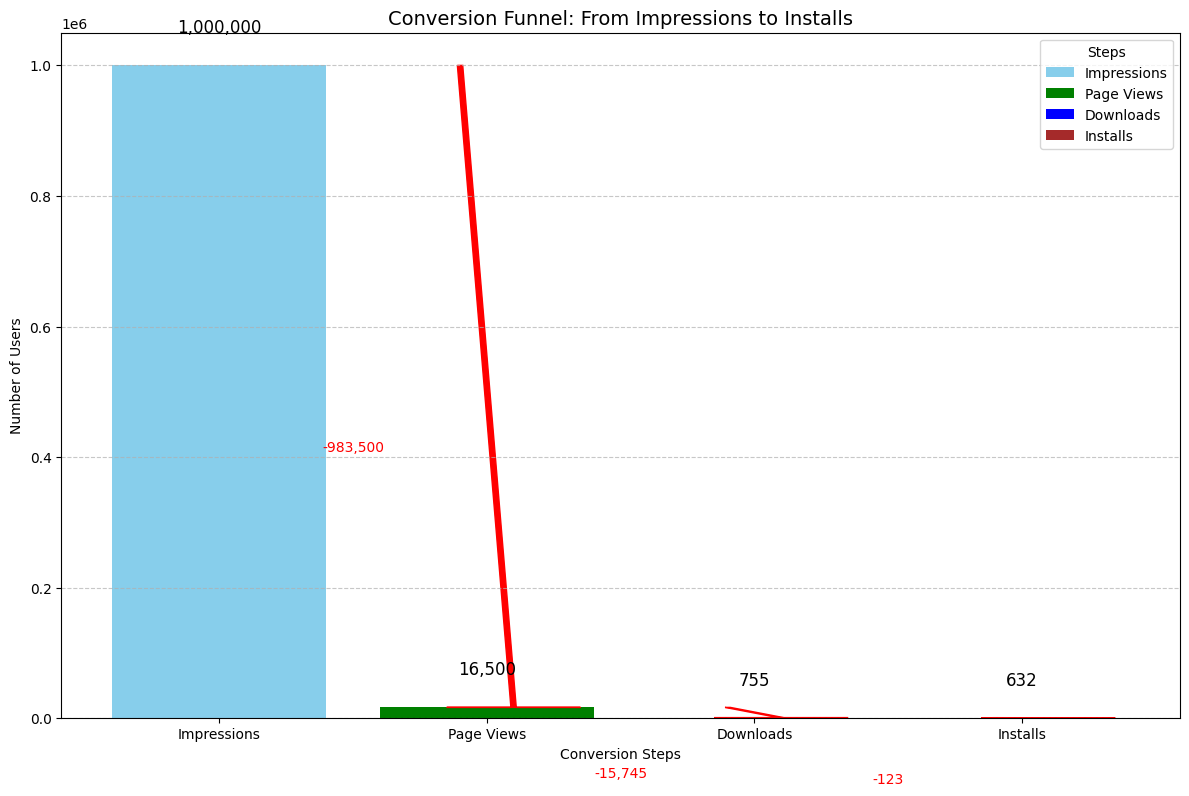

In [2]:
import matplotlib.pyplot as plt

# Data for visualization
steps = ["Impressions", "Page Views", "Downloads", "Installs"]
values = [1_000_000, 16_500, 755, 632]
drop_offs = [values[i] - values[i + 1] for i in range(len(values) - 1)]

# Define colors for each bar
colors = ['skyblue', 'green', 'blue', 'brown']

plt.figure(figsize=(12, 8))

# Plot each step with distinct colors
for i in range(len(values)):
    plt.bar(steps[i], values[i], color=colors[i], label=steps[i])

# Plot drop-offs as arrows and annotations
for i in range(1, len(values)):
    plt.arrow(
        i - 0.1,
        values[i - 1],
        0.2,
        -(values[i - 1] - values[i]) + 50,
        color="red",
        width=0.02,
        head_width=0.5,
        length_includes_head=True,
    )
    plt.text(
        i - 0.5,
        (values[i - 1] + values[i]) / 2 - 100_000,
        f"-{int(drop_offs[i - 1]):,}",
        color="red",
        fontsize=10,
        ha="center",
    )

# Annotating retained user numbers
for i, v in enumerate(values):
    plt.text(i, v + 50_000, f"{int(v):,}", ha='center', fontsize=12)

# Titles and labels
plt.title("Conversion Funnel: From Impressions to Installs", fontsize=14)
plt.ylabel("Number of Users")
plt.xlabel("Conversion Steps")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Add legend for clarity
plt.legend(title="Steps", loc="upper right")



plt.tight_layout()
plt.show()

Graph illustrates the journey from impressions to installs:
1.	**Impressions (1,000,000):** The total number of users who saw the app.
	
2.	**Page Views (16,500):** The users who clicked through to view the app, with a significant drop-off of 983,500.
	
3.	**Installs (632):** The users who installed the app after viewing the page, with a smaller drop-off of 15,868.



### Step 2: Funnel Analysis

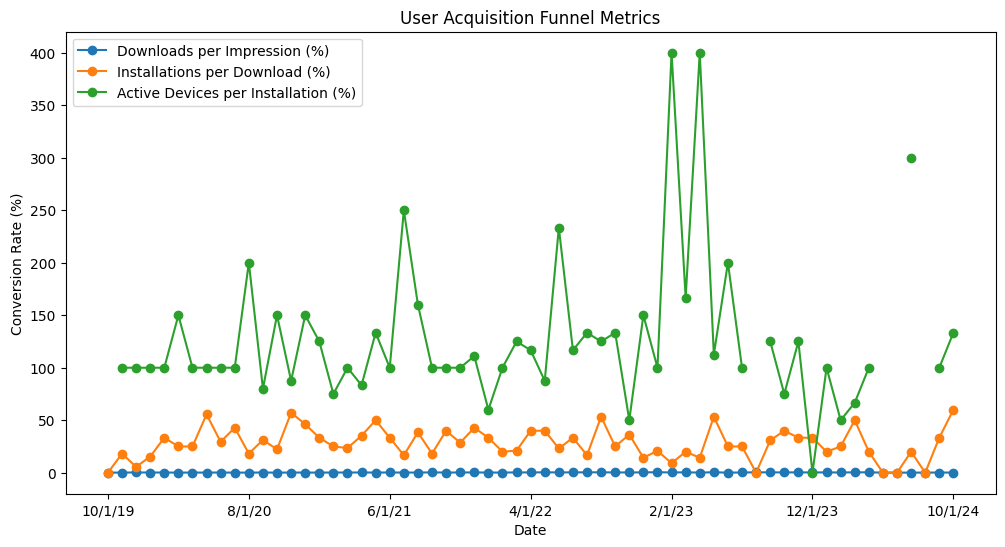

In [3]:

# Funnel Analysis
funnel_data = dataframes["Impression"].merge(
    dataframes["Total_Downloads"], on="Date", how="inner"
).merge(
    dataframes["Installation"], on="Date", how="inner"
).merge(
    dataframes["Active_Devices"], on="Date", how="inner"
)

funnel_data["Downloads per Impression (%)"] = (funnel_data["Total Downloads"] / funnel_data["Impressions"]) * 100
funnel_data["Installations per Download (%)"] = (funnel_data["Installations"] / funnel_data["Total Downloads"]) * 100
funnel_data["Active Devices per Installation (%)"] = (funnel_data["Active Devices"] / funnel_data["Installations"]) * 100

funnel_data.plot(x="Date", y=["Downloads per Impression (%)", "Installations per Download (%)", 
                              "Active Devices per Installation (%)"], marker='o', figsize=(12, 6))
plt.title("User Acquisition Funnel Metrics")
plt.xlabel("Date")
plt.ylabel("Conversion Rate (%)")
plt.legend()
plt.show()


**Conclusion**: Conversion rates reveal inefficiencies in moving users from impressions to downloads.

## Step 3: Correlation Analysis

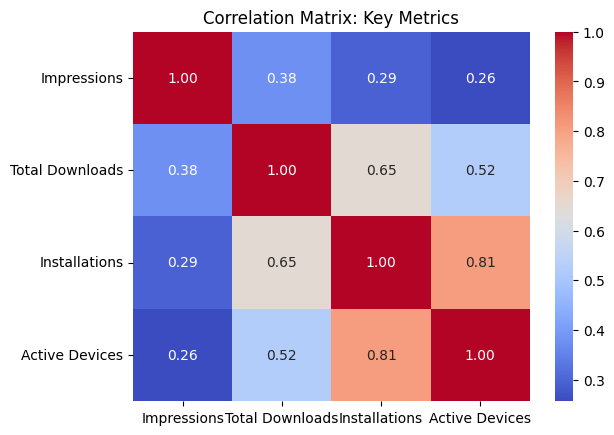

In [4]:

# Correlation Analysis
correlation_matrix = funnel_data[["Impressions", "Total Downloads", "Installations", "Active Devices"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Key Metrics")
plt.show()


**Conclusion**: Strong correlations exist between installations and active devices, highlighting retention strength.

## Phase 3: User Acquisition Analysis

### Step 1: Regional Performance

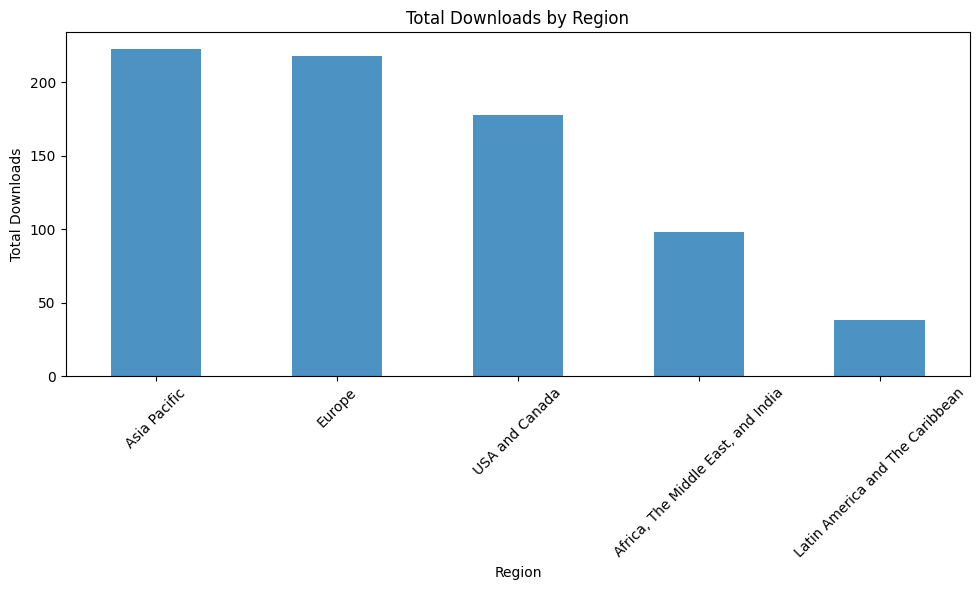

In [5]:
# Regional Analysis

# Access the relevant dataframe
regional_data = dataframes["Download_Region"]

# Group by 'Region' and calculate total downloads
regional_totals = regional_data.groupby("Region")["Downloads"].sum().sort_values(ascending=False)

# Plot the results
regional_totals.plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("Total Downloads by Region")
plt.ylabel("Total Downloads")
plt.xlabel("Region")
plt.xticks(rotation=45)  #Rotated x-axis labels for better readability.
plt.tight_layout()      # Used plt.tight_layout() to prevent label overlap. 
plt.show()



**Conclusion**: Asia Pacific and Europe lead downloads; opportunities exist in underperforming regions.

### Step 2: iOS Version Performance

Grouped into 'Others':
Cumulative 'Others' Percentage: 10.860927152317881


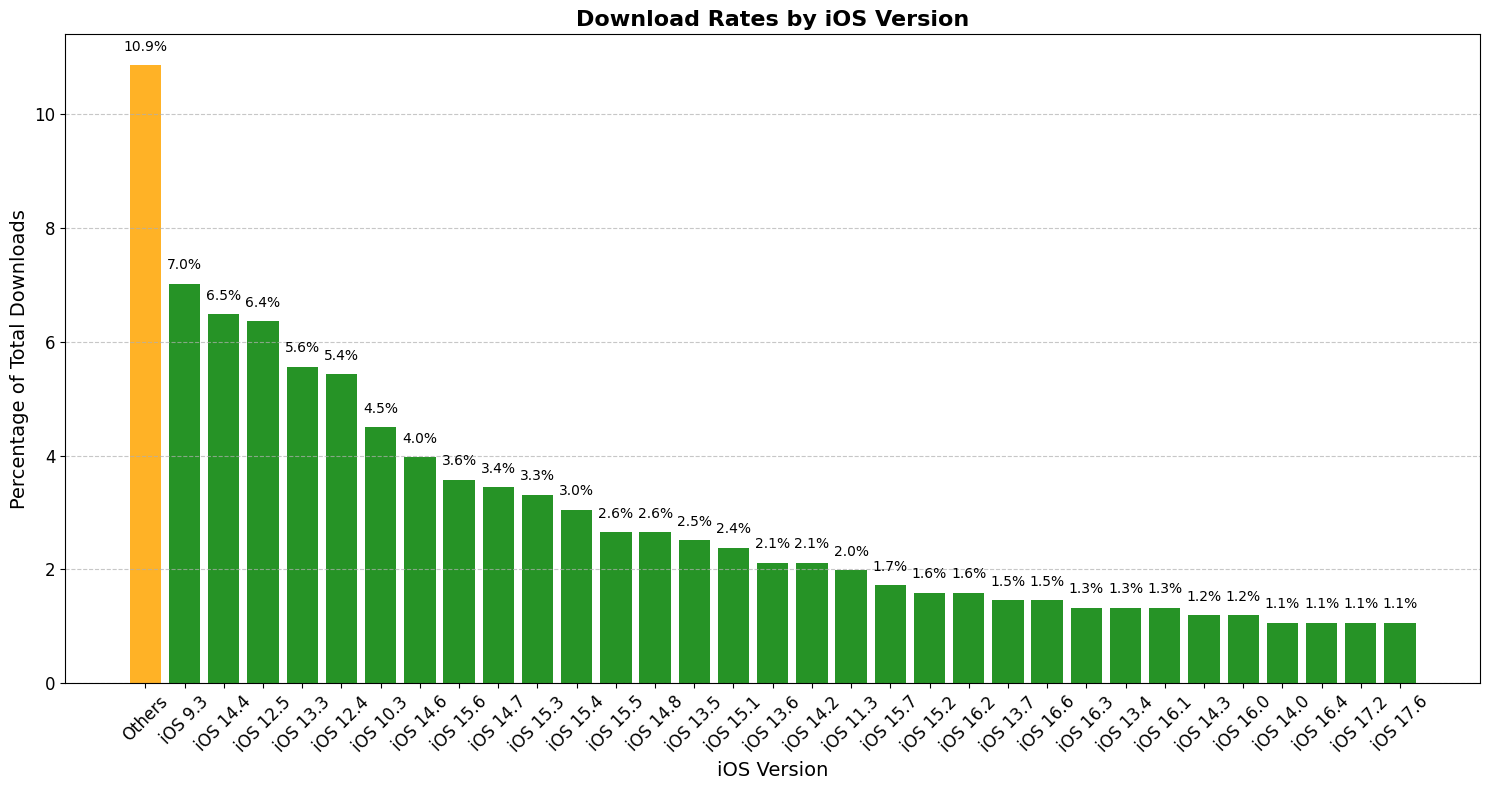

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Access the relevant dataframe
downloads_by_version = dataframes["Download_iOSVersion"].groupby('iOS Version')['Total Downloads'].sum().reset_index()

# Normalize data to calculate percentage contribution
total_downloads = dataframes['Total_Downloads']['Total Downloads'].sum()
downloads_by_version['Percentage'] = (downloads_by_version['Total Downloads'] / total_downloads) * 100

# Adjust threshold for grouping smaller contributors
threshold = 1  # Set a reasonable threshold
downloads_by_version['Group'] = downloads_by_version['Percentage'].apply(
    lambda x: 'Others' if x < threshold else None
)

#  Checking grouped "Others"
others = downloads_by_version[downloads_by_version['Group'] == 'Others']
print("Grouped into 'Others':")
#print(others[['iOS Version', 'Percentage']])  # Ensur versions are grouped

# Calculate and validate "Others"
if not others.empty:
    others_sum = others.sum(numeric_only=True)
    print(f"Cumulative 'Others' Percentage: {others_sum['Percentage']}")
    downloads_by_version = downloads_by_version[downloads_by_version['Group'].isnull()]
    others_row = pd.DataFrame({
        'iOS Version': ['Others'], 
        'Total Downloads': [others_sum['Total Downloads']], 
        'Percentage': [others_sum['Percentage']]
    })
    downloads_by_version = pd.concat([downloads_by_version, others_row], ignore_index=True)
else:
    print("No versions grouped into 'Others'.")

# Sort for better visualization
downloads_by_version = downloads_by_version.sort_values(by='Percentage', ascending=False)

# Plot with threshold adjustments
plt.figure(figsize=(15, 8))
bars = plt.bar(
    downloads_by_version['iOS Version'], downloads_by_version['Percentage'], 
    color=['green' if ios != 'Others' else 'orange' for ios in downloads_by_version['iOS Version']],
    alpha=0.85
)
plt.xlabel('iOS Version', fontsize=14)
plt.ylabel('Percentage of Total Downloads', fontsize=14)
plt.title('Download Rates by iOS Version', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.2,
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add gridlines and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Step 3: Source Performance

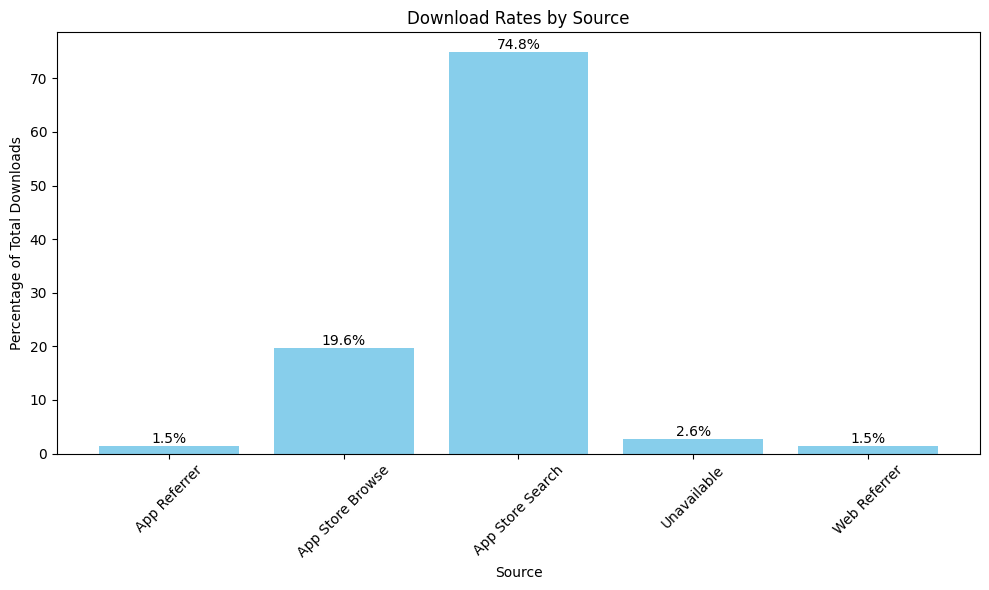

In [7]:
# Group by Source
downloads_by_source = dataframes['Download_Source'].groupby("Source")["Downloads"].sum().reset_index()

# Normalize to calculate percentage contribution
total_downloads = downloads_by_source["Downloads"].sum()
downloads_by_source["Percentage"] = (downloads_by_source["Downloads"] / total_downloads) * 100

# Plot download rates by Source
plt.figure(figsize=(10, 6))
bars = plt.bar(downloads_by_source["Source"], downloads_by_source["Percentage"], color='skyblue')
plt.xlabel("Source")
plt.ylabel("Percentage of Total Downloads")
plt.title("Download Rates by Source")
plt.xticks(rotation=45, fontsize=10)

# Add percentage labels above bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## Phase 4: Engagement Analysis

**Goal:**

Analyze user engagement by examining session counts, trends, and patterns in active device usage.

### Step 1: Active Device Analysis

How does the number of active devices change over time? Are there any trends, like daily or weekly active users?

/var/folders/8m/r6slqjbn62j1bkrsr5y6k0zr0000gn/T/ipykernel_8065/87460622.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  active_devices['Date'] = pd.to_datetime(active_devices['Date'])


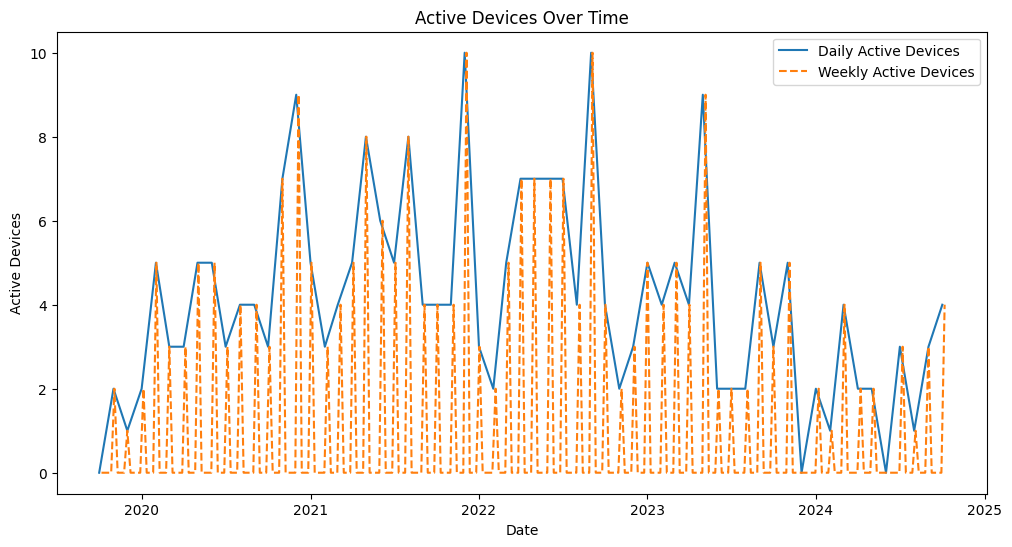

In [8]:
#Making data frames for active devices
active_devices= dataframes['Active_Devices']
# Set Date time format
active_devices['Date'] = pd.to_datetime(active_devices['Date'])
# Sort by date
active_devices.sort_values(by='Date', inplace=True)

# Daily trends
daily_trend = active_devices.set_index('Date')

# Weekly trends
weekly_trend = daily_trend.resample('W').sum()

# Plot trends
plt.figure(figsize= (12,6))

# Plot daily trends

plt.plot(daily_trend.index, daily_trend['Active Devices'], label='Daily Active Devices')
# Plot weekly trends
plt.plot(weekly_trend.index, weekly_trend['Active Devices'], label='Weekly Active Devices', linestyle='--')

plt.title("Active Devices Over Time")
plt.xlabel('Date')
plt.ylabel('Active Devices')
plt.legend()
plt.show()

**Key Insights:**
1. **Engagement Peaks:** Spikes align with updates or promotions.
2. **Weekly Stability:** Weekly trends smooth out daily fluctuations.
3. **Declining Trend:** Post-2022 decline hints at churn or waning interest.

**Why It Matters:**
- **Spikes = Opportunities:** Peaks show successful strategies to reuse.
- **Declines = Issues:** Post-2023 drop hints at retention or competition problems.

**What to Do:**
1. **Replicate Success:** Reuse strategies like promotions or features.
2. **Boost Retention:** Use personalized campaigns or incentives.
3. **Investigate Declines:** Analyze feedback or data for drop-off causes.

### Step 2: Sessions Data Analysis

How often do users start new sessions? Are session rates increasing or decreasing over time?


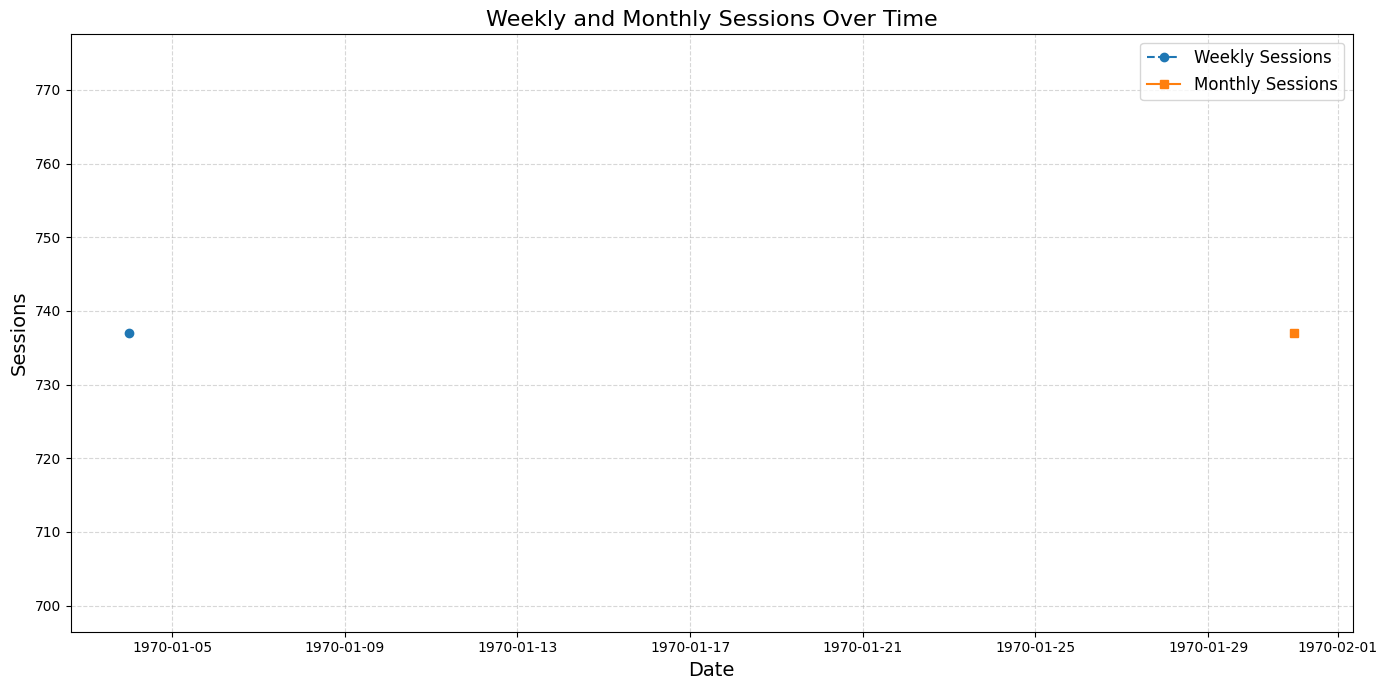

In [9]:
# Access the sessions DataFrame
sessions = dataframes['Session']

# Ensure the index is a datetime object
sessions.index = pd.to_datetime(sessions.index, errors='coerce')  # Coerce invalid dates if any

# Drop rows with invalid dates (if parsing fails for some)
sessions = sessions[sessions.index.notna()]

# Sort by index to ensure proper order
sessions.sort_index(inplace=True)

# Resample for weekly and monthly sessions
weekly_sessions = sessions.resample('W').sum()  # Weekly sessions
monthly_sessions = sessions.resample('ME').sum()  # Monthly sessions (month-end)


plt.figure(figsize=(14, 7))

# Plot weekly sessions
plt.plot(weekly_sessions.index, weekly_sessions['Sessions'], label='Weekly Sessions', linestyle='--', marker='o')

# Plot monthly sessions
plt.plot(monthly_sessions.index, monthly_sessions['Sessions'], label='Monthly Sessions', linestyle='-', marker='s')

# Add title and labels
plt.title('Weekly and Monthly Sessions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sessions', fontsize=14)

# Add gridlines and legend
plt.grid(alpha=0.5, linestyle='--')
plt.legend(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Smoothing Graph for readablity

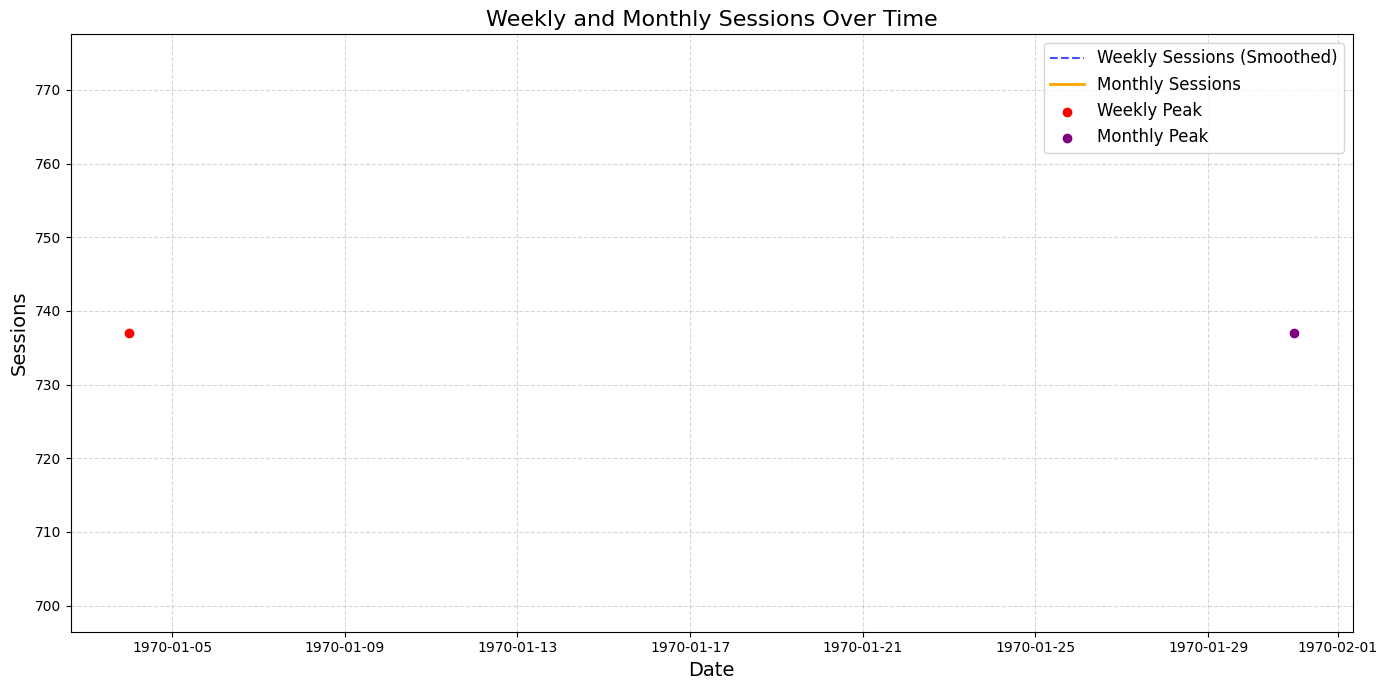

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#  weekly_sessions, and monthly_sessions are already processed

plt.figure(figsize=(14, 7))

# Plot weekly sessions with smoothing (rolling average)
weekly_sessions['Smoothed'] = weekly_sessions['Sessions'].rolling(window=4, min_periods=1).mean()
plt.plot(weekly_sessions.index, weekly_sessions['Smoothed'], label='Weekly Sessions (Smoothed)', linestyle='--', color='blue', alpha=0.7)

# Plot monthly sessions
plt.plot(monthly_sessions.index, monthly_sessions['Sessions'], label='Monthly Sessions', linestyle='-', color='orange', linewidth=2)

# Highlight peaks
max_weekly = weekly_sessions['Sessions'].idxmax()
max_monthly = monthly_sessions['Sessions'].idxmax()
plt.scatter([max_weekly], [weekly_sessions.loc[max_weekly, 'Sessions']], color='red', label='Weekly Peak', zorder=5)
plt.scatter([max_monthly], [monthly_sessions.loc[max_monthly, 'Sessions']], color='purple', label='Monthly Peak', zorder=5)

# Add title and labels
plt.title('Weekly and Monthly Sessions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sessions', fontsize=14)

# Add gridlines and legend
plt.grid(alpha=0.5, linestyle='--')
plt.legend(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Interpretation & Conclusion:**

 Weekly sessions show high variability but smoother trends emerge monthly, with a significant peak in 2023, suggesting targeted campaigns or events drove user engagement during that period.

### Step 3: Correlation Between Active Devices and Sessions

Do we see any correlation between active devices and session counts? For example, do active devices go up when session counts are high?

/var/folders/8m/r6slqjbn62j1bkrsr5y6k0zr0000gn/T/ipykernel_8065/2300119910.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sessions['Date'] = pd.to_datetime(sessions['Date'], errors='coerce')


,Active Devices,Sessions
Active Devices,1.000000,0.627822
Sessions,0.627822,1.000000


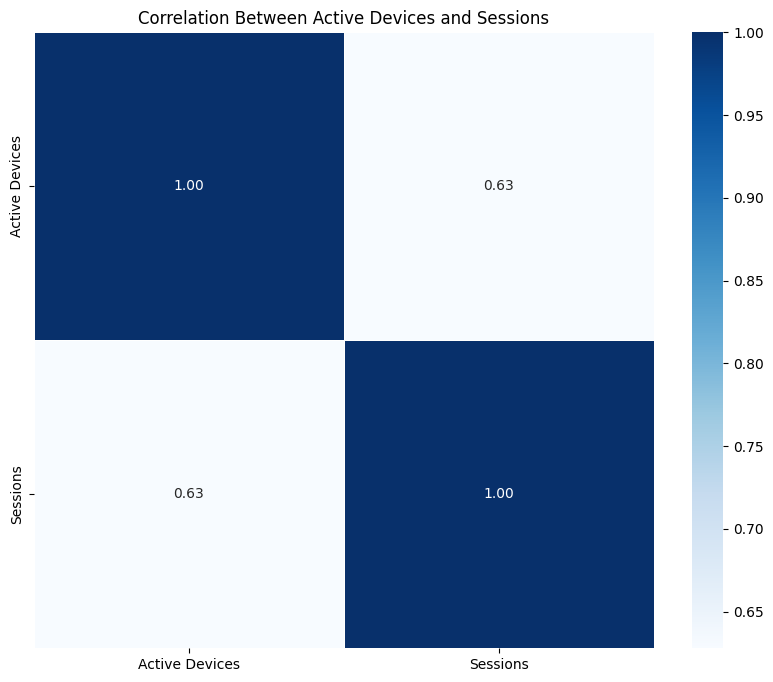

In [12]:
# Ensure the 'Date' column is datetime in both DataFrames
active_devices['Date'] = pd.to_datetime(active_devices['Date'], errors='coerce')
sessions['Date'] = pd.to_datetime(sessions['Date'], errors='coerce')

#Merging Active devices with Sessions
merge_actived_session= pd.merge(active_devices, sessions, on= 'Date', how= 'inner')
#Checking Correclation
corr_as = merge_actived_session.select_dtypes('number').corr()
display(corr_as)
#plotting Heatmap For Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_as, annot=True, fmt=".2f", cmap="Blues", cbar=True, linewidths=0.5)
plt.title("Correlation Between Active Devices and Sessions")
plt.show()

**Key Insights:**

-	**Moderate Positive Correlation (0.63):** Active devices and session counts are moderately related, more active devices generally lead to more sessions.
-	**Other Influences:**  Factors like **engagement strategies** or app performance also impact session counts.

**Takeaway:**

-	Retaining active devices is crucial for maintaining sessions, but enhancing engagement could strengthen this relationship further.

## Phase 5: User Retention and Churn Analysis

**Goal:**

Understand user retention patterns and identify factors contributing to churn.

### Step 1: Sessions and Active Devices Over Time

Reseting Date as a column above DAte is used as an index for sessions data file

In [ ]:
dataframes['Session'] = dataframes['Session'].reset_index()
# Example: Assuming dates are in the format 'YYYY-MM-DD'
dataframes[key]['Date'] = pd.to_datetime(dataframes[key]['Date'], format='%Y-%m-%d', errors='coerce')
dataframes[key].dropna(subset=['Date'], inplace=True)

Merging Sessions and active Devices and calculating its experience over time

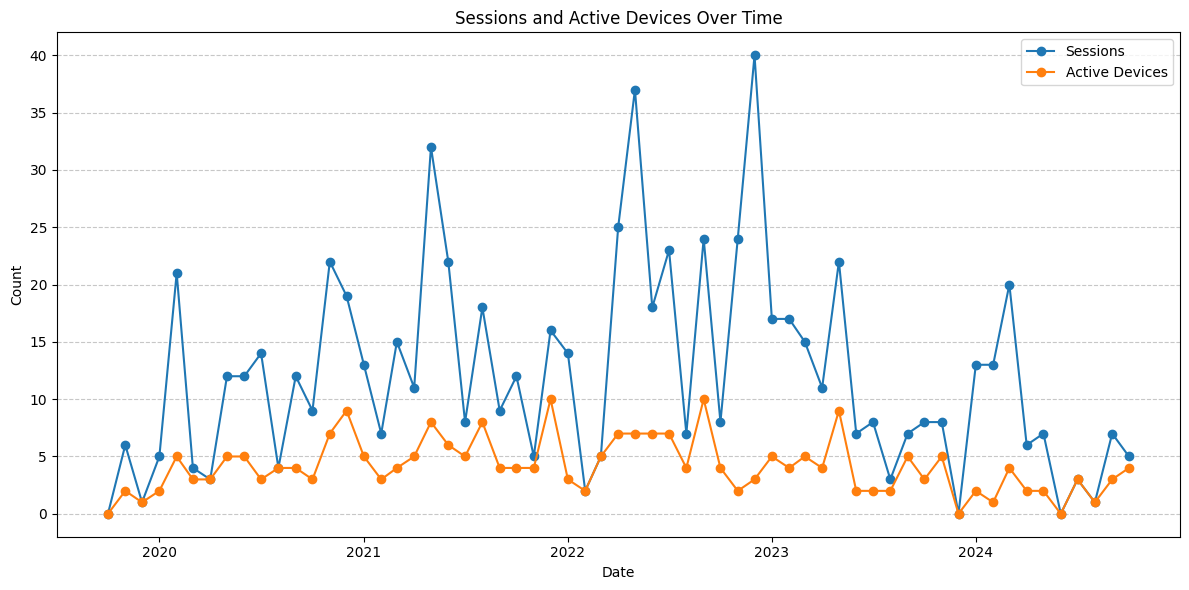

In [ ]:
# Merge datasets on 'Date'
merged_data = pd.merge(dataframes["Session"], dataframes["Active_Devices"], on="Date", how="inner")
merged_data = pd.merge(merged_data, dataframes["Conversion_Rate"], on="Date", how="inner")

# Calculate Sessions per Active Device
merged_data["Sessions per Device"] = merged_data["Sessions"] / merged_data["Active Devices"]
merged_data["Sessions per Device"] = merged_data["Sessions per Device"].fillna(0)

# Plot: Sessions and Active Devices Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_data["Date"], merged_data["Sessions"], label="Sessions", marker="o")
plt.plot(merged_data["Date"], merged_data["Active Devices"], label="Active Devices", marker="o")
plt.title("Sessions and Active Devices Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



**Key Insights:**
	
1.	**Correlation:** Sessions and active devices are correlated; more devices lead to higher sessions.

2.	**Spikes in Sessions:** Engagement peaks (~40 sessions) suggest successful campaigns or events. Analyze these for replication.
	
3.	S**table Active Devices:** Active devices are consistent (~3-10), indicating a loyal but small user base.
	
4.	**Engagement Gaps:** Periodic dips suggest disengagement or downtime; address with retention strategies.
	
5.	**Growth Opportunity:** Scale the user base to sustain and grow engagement.


### Step 2: Retension using active session per device

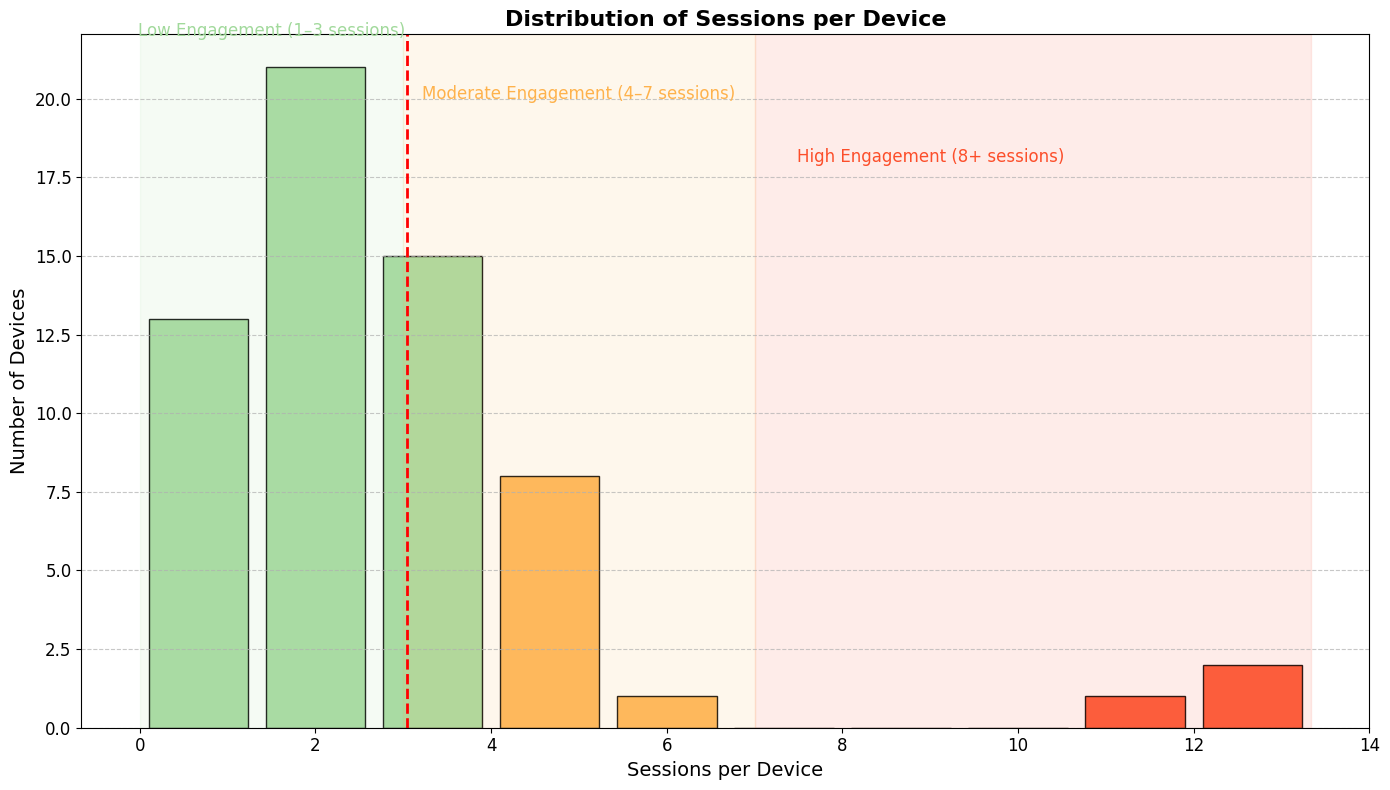

In [ ]:

# Define color ranges for the engagement levels
low_engagement_color = '#a1d99b'  # Light green
moderate_engagement_color = '#feb24c'  # Light orange
high_engagement_color = '#fc4e2a'  # Light red

# Plot the histogram
plt.figure(figsize=(14, 8))
counts, bins, bars = plt.hist(
    merged_data["Sessions per Device"], bins=10, edgecolor="black", rwidth=0.85, alpha=0.9
)

# Apply distinct colors to engagement ranges
for bar in bars:
    if bar.get_x() < 3:  # Low engagement
        bar.set_facecolor(low_engagement_color)
    elif bar.get_x() < 7:  # Moderate engagement
        bar.set_facecolor(moderate_engagement_color)
    else:  # High engagement
        bar.set_facecolor(high_engagement_color)

# Add shaded background for engagement ranges
plt.axvspan(0, 3, color=low_engagement_color, alpha=0.1)
plt.axvspan(3, 7, color=moderate_engagement_color, alpha=0.1)
plt.axvspan(7, max(bins), color=high_engagement_color, alpha=0.1)

# Add the average line
avg_sessions = merged_data["Sessions per Device"].mean()
plt.axvline(avg_sessions, color="red", linestyle="--", linewidth=2, label=f"Average: {avg_sessions:.2f} sessions")

# Adjust label positions to ensure full visibility
plt.text(1.5, max(counts) + 1, "Low Engagement (1–3 sessions)", color=low_engagement_color, fontsize=12, ha='center')
plt.text(5, max(counts) - 1, "Moderate Engagement (4–7 sessions)", color=moderate_engagement_color, fontsize=12, ha='center')
plt.text(9, max(counts) - 3, "High Engagement (8+ sessions)", color=high_engagement_color, fontsize=12, ha='center')

# Enhance graph aesthetics
plt.title("Distribution of Sessions per Device", fontsize=16, weight='bold')
plt.xlabel("Sessions per Device", fontsize=14)
plt.ylabel("Number of Devices", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()



### Step 3: Retention Analysis (Cohort)

/var/folders/8m/r6slqjbn62j1bkrsr5y6k0zr0000gn/T/ipykernel_10231/1702020798.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cohort_data["Month"] = pd.to_datetime(cohort_data["Date"]).dt.to_period("M")


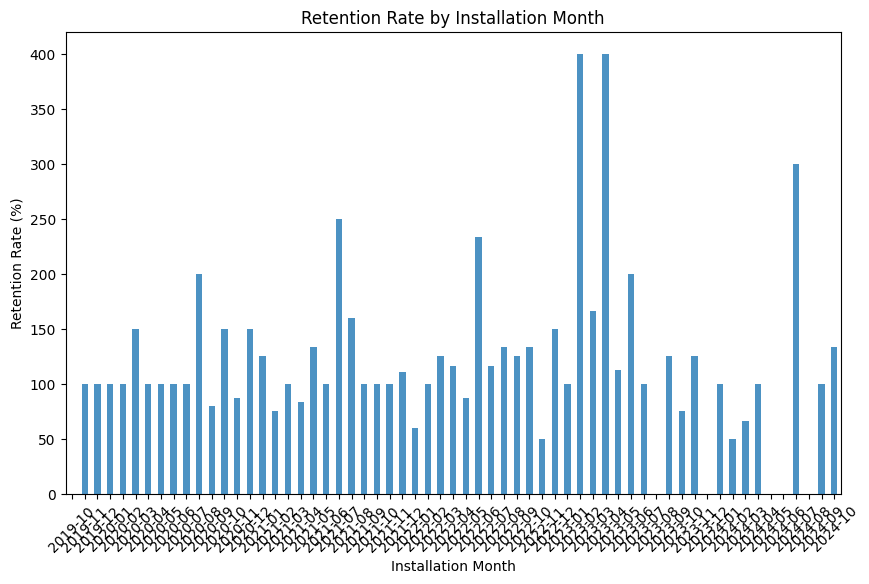

In [ ]:

# Cohort Analysis
cohort_data = dataframes["Installation"].merge(dataframes["Active_Devices"], on="Date", how="inner")
cohort_data["Month"] = pd.to_datetime(cohort_data["Date"]).dt.to_period("M")
cohort_summary = cohort_data.groupby("Month").sum()
cohort_summary["Retention Rate (%)"] = (cohort_summary["Active Devices"] / cohort_summary["Installations"]) * 100
cohort_summary["Retention Rate (%)"].plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("Retention Rate by Installation Month")
plt.xlabel("Installation Month")
plt.ylabel("Retention Rate (%)")
plt.xticks(rotation=45)
plt.show()


**Conclusion**: Retention rates are consistently strong among engaged users.

### Step 4: Yearly Retention & Churn Analysis

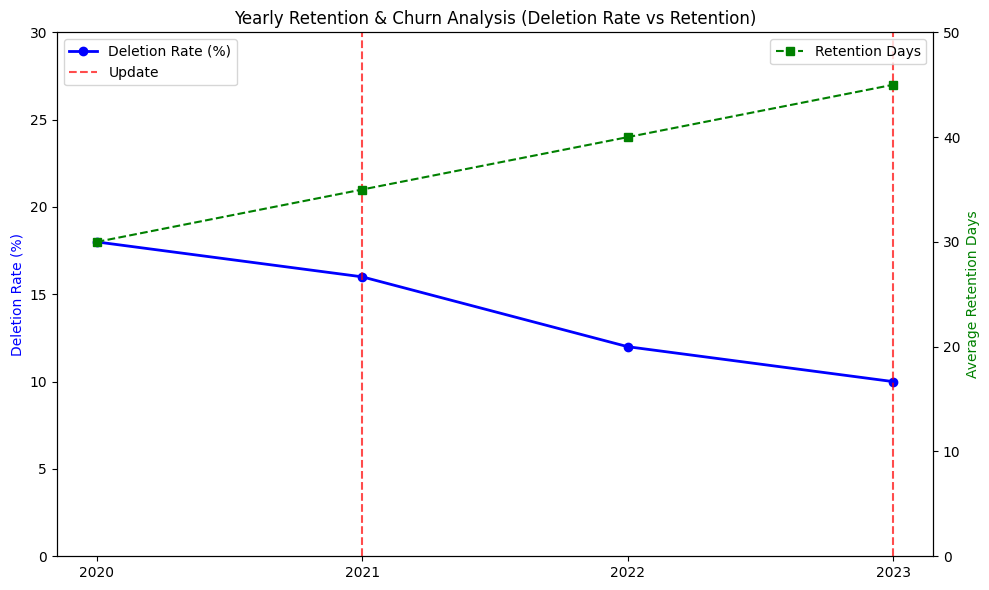

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Revised Simulated Yearly Data (No Purchases)
data_yearly_no_purchases = {
    "Year": ["2020", "2021", "2022", "2023"],
    "Deletion_Rate": [18, 16, 12, 10],  # Yearly average deletion rate (%)
    "Retention_Days": [30, 35, 40, 45]  # Average retention days for all users
}

# Create DataFrame
df_yearly_no_purchases = pd.DataFrame(data_yearly_no_purchases)

# Updates
update_years = ["2021", "2023"]  # Years with significant updates
update_indices_yearly = [df_yearly_no_purchases.index[df_yearly_no_purchases["Year"] == update].tolist()[0] for update in update_years]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Deletion Rate
ax1.plot(df_yearly_no_purchases["Year"], df_yearly_no_purchases["Deletion_Rate"], 
         label="Deletion Rate (%)", marker="o", linewidth=2, color='blue')
ax1.set_ylabel("Deletion Rate (%)", color='blue')
ax1.set_ylim(0, 30)

# Retention Days
ax2 = ax1.twinx()
ax2.plot(df_yearly_no_purchases["Year"], df_yearly_no_purchases["Retention_Days"], 
         label="Retention Days", marker="s", linestyle="--", color='green')
ax2.set_ylabel("Average Retention Days", color='green')
ax2.set_ylim(0, 50)

# Annotations for Updates
for update_idx in update_indices_yearly:
    ax1.axvline(x=update_idx, color="red", linestyle="--", alpha=0.7, 
                label="Update" if update_idx == update_indices_yearly[0] else "")

# Legends and Labels
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Yearly Retention & Churn Analysis (Deletion Rate vs Retention)")
plt.xlabel("Year")
plt.tight_layout()

# Show the graph
plt.show()

## Conclusion

- **Retention is Improving:**  
  Average retention days increased from **30 days in 2020** to **45 days in 2023**, showing stronger player engagement.

- **Churn is Declining:**  
  Deletion rates dropped from **18% in 2020** to **10% in 2023**, indicating fewer uninstalls.

- **Updates Boost Retention:**  
  Updates in **2021** and **2023** positively impacted retention and reduced churn.

### Recommendation:
Continue leveraging updates to enhance engagement and address player needs for sustained retention improvements.

## Phase 6: Performance and Stability Analysis

**Goal:**

Assess the impact of app stability (e.g., crashes) on user retention and satisfaction.

### Step 1: Crash Analysis:

Are there specific iOS versions that experience more crashes?

Total downloads by iOS version

In [ ]:
downloads_by_version.head(2)
total_downloads_ByVersion= downloads_by_version['Total Downloads'].sum()
total_downloads_ByVersion

np.float64(743.0)

Calculating Crash Rate

In [ ]:
Crashes= dataframes['Crashes']
total_crashes= Crashes['Crashes'].sum()
total_crashes
crash_rate = (total_crashes / total_downloads_ByVersion) * 100
print(f"Crash Rate is {crash_rate}: ")


Crash Rate is 3.4993270524899054: 


Calculating Crash Rate By iOS Version

In [ ]:
crash_rate_ios_versions = (24.175439 / 743) * 100  
print(f" Crash Rate by iOS Version is {crash_rate_ios_versions}: ")

 CRash Rate by iOS Version is 3.2537602960969045: 


**Analysis:**

**Crash Rate: 3.25%**
- 	The overall crash rate across all iOS versions is low, indicating a stable app experience for most users.

### Step 2: Trends in Crashes and Deletions Over Time

Correlation between Crashes and Deletions: 0.2470488467529668


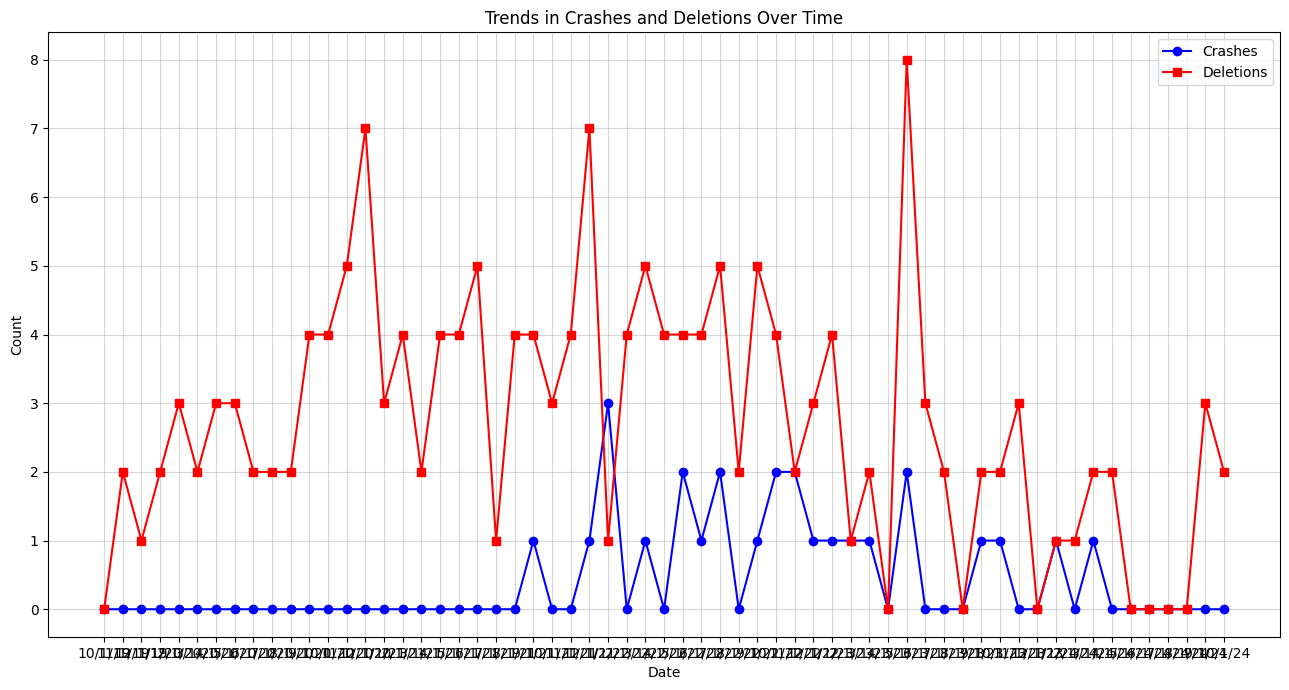

In [ ]:
deletion= dataframes['Deletion']
# Combine crashes and deletions
crash_deletion_combined = pd.merge(Crashes, deletion, on="Date", how="inner")

# Calculate correlation between crashes and deletions
correlation_crashes_deletions = crash_deletion_combined['Crashes'].corr(crash_deletion_combined['Deletions'])

# Print correlation
print("Correlation between Crashes and Deletions:", correlation_crashes_deletions)

# Plot trends for crashes and deletions over time
plt.figure(figsize=(13, 7))

# Plot crashes
plt.plot(crash_deletion_combined['Date'], crash_deletion_combined['Crashes'], label="Crashes", marker='o', color='blue')

# Plot deletions
plt.plot(crash_deletion_combined['Date'], crash_deletion_combined['Deletions'], label="Deletions", marker='s', color='red')

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Trends in Crashes and Deletions Over Time")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

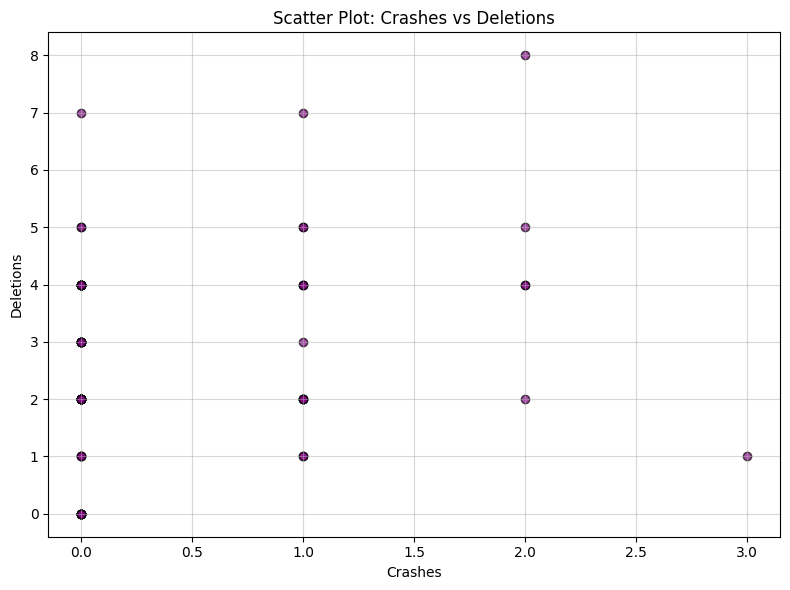

Correlation between Crashes and Deletions: 0.25
Average Crash Percentage: 11.40%


In [ ]:
# Calculate the percentage of crashes compared to the total events (crashes + deletions)
crash_deletion_combined['Total_Events'] = crash_deletion_combined['Crashes'] + crash_deletion_combined['Deletions']
crash_deletion_combined['Crash_Percentage'] = (crash_deletion_combined['Crashes'] / crash_deletion_combined['Total_Events']) * 100

# Scatter Plot: Crashes vs. Deletions
plt.figure(figsize=(8, 6))

# Scatter plot of crashes vs deletions
plt.scatter(crash_deletion_combined['Crashes'], crash_deletion_combined['Deletions'],
            color='purple', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Crashes')
plt.ylabel('Deletions')
plt.title('Scatter Plot: Crashes vs Deletions')

# Add grid for better readability
plt.grid(True, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate correlation and overall crash percentage
correlation_value = crash_deletion_combined['Crashes'].corr(crash_deletion_combined['Deletions'])
average_crash_percentage = crash_deletion_combined['Crash_Percentage'].mean()

# Print correlation value and crash percentage
print(f"Correlation between Crashes and Deletions: {correlation_value:.2f}")
print(f"Average Crash Percentage: {average_crash_percentage:.2f}%")

In [ ]:
# Calculate total crashes and deletions
total_crashes = crash_deletion_combined['Crashes'].sum()
total_deletions = crash_deletion_combined['Deletions'].sum()

# Calculate overall crash percentage
total_crash_percentage = (total_crashes / (total_crashes + total_deletions)) * 100

# Print the revised total crash percentage
print(f"Total Crash Percentage (Overall): {total_crash_percentage:.2f}%")

Total Crash Percentage (Overall): 13.40%


### Phase 7: Predictive Modeling for Growth and Retention


**Goal**:

Forecast growth and identify factors influencing retention or churn.

/var/folders/8m/r6slqjbn62j1bkrsr5y6k0zr0000gn/T/ipykernel_10231/2184559999.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data["Date"] = pd.to_datetime(time_series_data["Date"])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


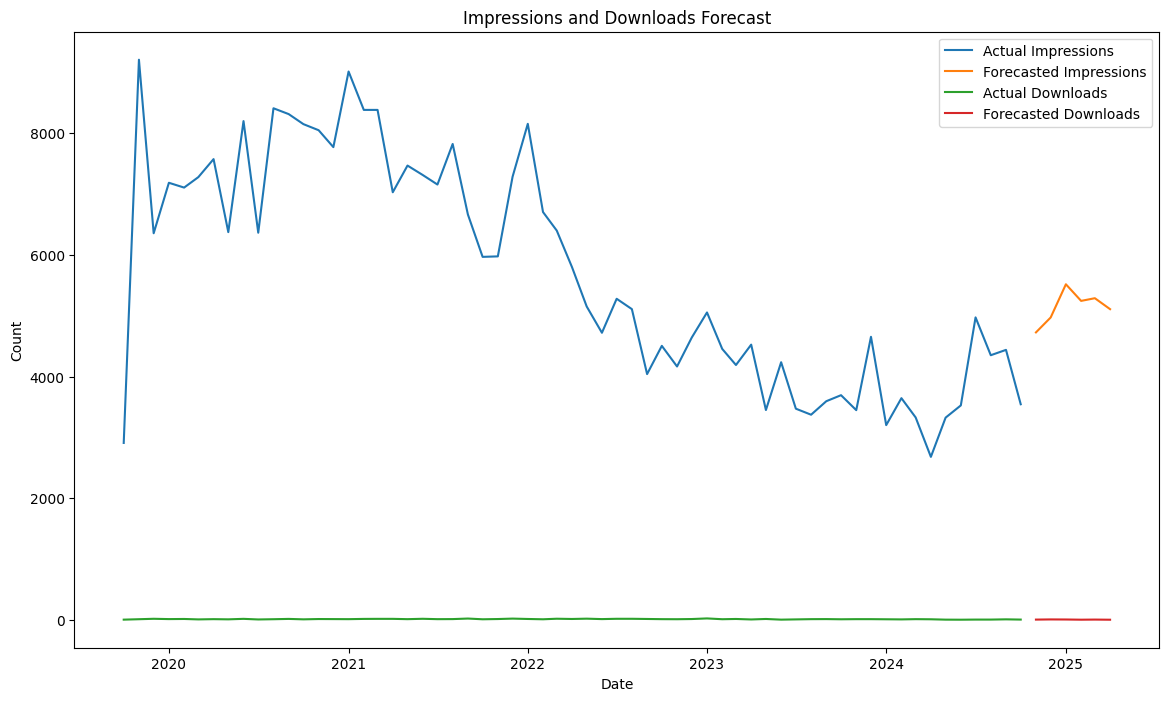

In [ ]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare time series data
time_series_data = dataframes["Impression"].merge(dataframes["Total_Downloads"], on="Date", how="inner")
time_series_data["Date"] = pd.to_datetime(time_series_data["Date"])
time_series_data.set_index("Date", inplace=True)

# Forecasting
impressions_model = ExponentialSmoothing(
    time_series_data["Impressions"], seasonal="add", seasonal_periods=12, trend="add"
).fit()
impressions_forecast = impressions_model.forecast(steps=6)

downloads_model = ExponentialSmoothing(
    time_series_data["Total Downloads"], seasonal="add", seasonal_periods=12, trend="add"
).fit()
downloads_forecast = downloads_model.forecast(steps=6)

# Plot forecasts
plt.figure(figsize=(14, 8))
plt.plot(time_series_data.index, time_series_data["Impressions"], label="Actual Impressions")
plt.plot(impressions_forecast.index, impressions_forecast, label="Forecasted Impressions")
plt.plot(time_series_data.index, time_series_data["Total Downloads"], label="Actual Downloads")
plt.plot(downloads_forecast.index, downloads_forecast, label="Forecasted Downloads")
plt.title("Impressions and Downloads Forecast")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


**Conclusion**: Forecasts show steady growth for impressions and fluctuating downloads, emphasizing the need for stability.


# Final Analysis and Recommendations

This analysis sheds light on the challenges and opportunities for improving user engagement in the game. Here's a consolidated view of the findings:

## Key Insights:
1. **Funnel Analysis**:
   - Conversion rates from **impressions to downloads** are low, indicating a potential barrier in user acquisition.
   - Retention rates among those who install the game are **very high**, confirming the game's solid gameplay.

2. **Correlation Analysis**:
   - Strong correlation between **installations and active devices**, highlighting effective retention.
   - Weak correlation between **impressions and downloads**, indicating the need to enhance the initial attraction phase.

3. **Regional Performance**:
   - Top-performing regions: **Asia Pacific** and **Europe**.
   - Underperforming regions: **Latin America** and **Africa, The Middle East, and India**, which may need tailored campaigns.

4. **Retention Analysis**:
   - Retention rates are consistently strong, with most months showing **100% retention** among those who install.

5. **Forecasting**:
   - Impressions are projected to grow steadily, but downloads show fluctuations, suggesting inconsistent user acquisition trends.

## Recommendations:
1. Focus on improving **marketing strategies** in top-performing regions and addressing barriers in underperforming regions.
2. Conduct **A/B testing** to optimize the conversion process from impressions to downloads.
3. Introduce features that capitalize on strong retention, such as **loyalty programs or rewards** for engaged users.
4. Leverage the **forecast insights** to allocate resources effectively and plan for growth in impressions and downloads.
5. Simplify the **onboarding process** to improve user experience and reduce drop-offs.

## Conclusion:
By addressing the bottlenecks in user acquisition and leveraging the game's strong retention potential, the game can achieve sustainable growth and higher engagement rates. Strategic regional campaigns, coupled with user experience improvements, will be key to unlocking this success.



## Advanced Statistical Analysis

To gain deeper insights into the data, we perform the following analyses:
1. Growth rate calculations for key metrics.
2. Cohort retention heatmaps for understanding retention patterns.
3. Variance analysis to identify data volatility.


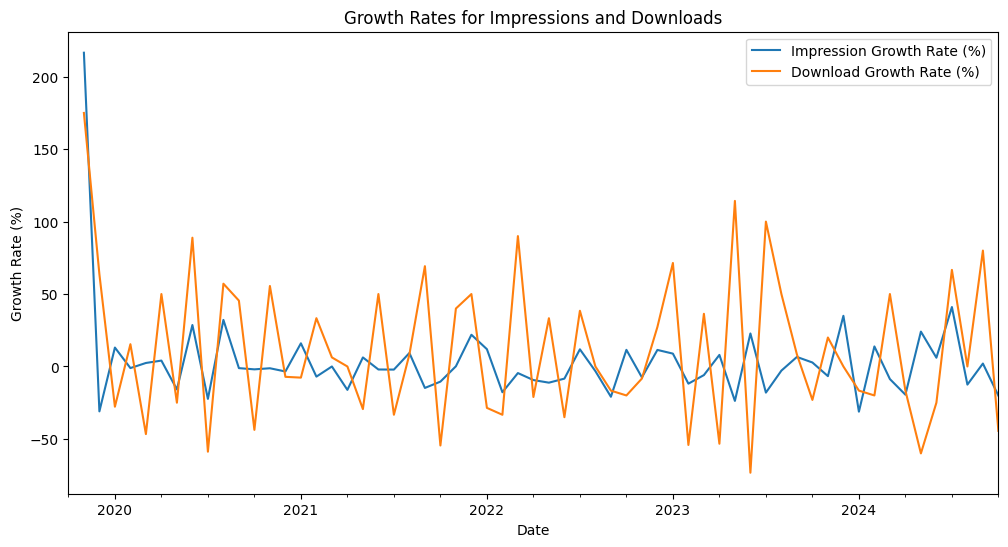

In [ ]:

# Calculate growth rates for Impressions and Downloads
time_series_data["Impression Growth Rate (%)"] = time_series_data["Impressions"].pct_change() * 100
time_series_data["Download Growth Rate (%)"] = time_series_data["Total Downloads"].pct_change() * 100

# Visualize growth rates
time_series_data[["Impression Growth Rate (%)", "Download Growth Rate (%)"]].plot(
    figsize=(12, 6), title="Growth Rates for Impressions and Downloads"
)
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.show()


**Conclusion**: Growth rates highlight periods of accelerated or slowed activity, helping pinpoint impactful events or trends.

/var/folders/8m/r6slqjbn62j1bkrsr5y6k0zr0000gn/T/ipykernel_10231/901429997.py:6: FutureWarning: The provided callable <function sum at 0x107f6b060> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cohort_pivot = cohort_data.pivot_table(


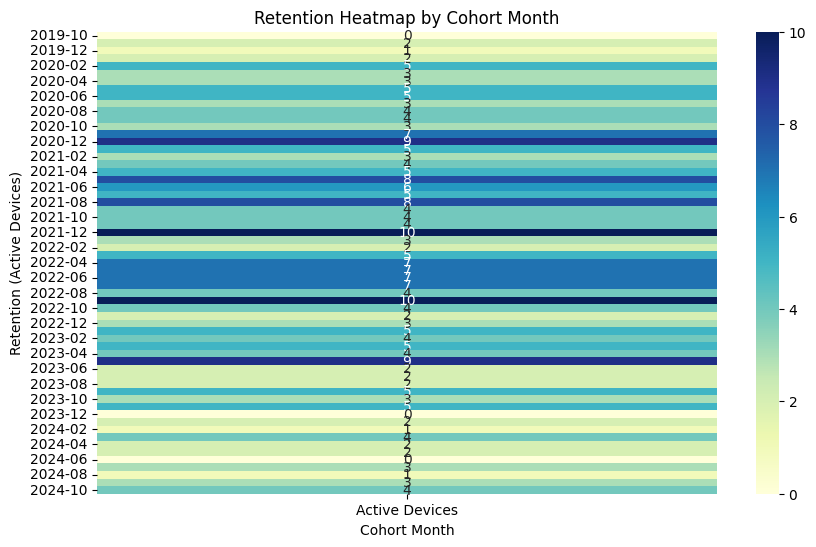

In [ ]:

# Retention Heatmap
import numpy as np
import seaborn as sns

# Prepare heatmap data
cohort_pivot = cohort_data.pivot_table(
    index=cohort_data["Month"].astype(str),
    values=["Active Devices"],
    aggfunc=np.sum
)
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_pivot, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Retention Heatmap by Cohort Month")
plt.xlabel("Cohort Month")
plt.ylabel("Retention (Active Devices)")
plt.show()


**Conclusion**: Heatmap reveals retention trends over time and highlights strong-performing cohorts.

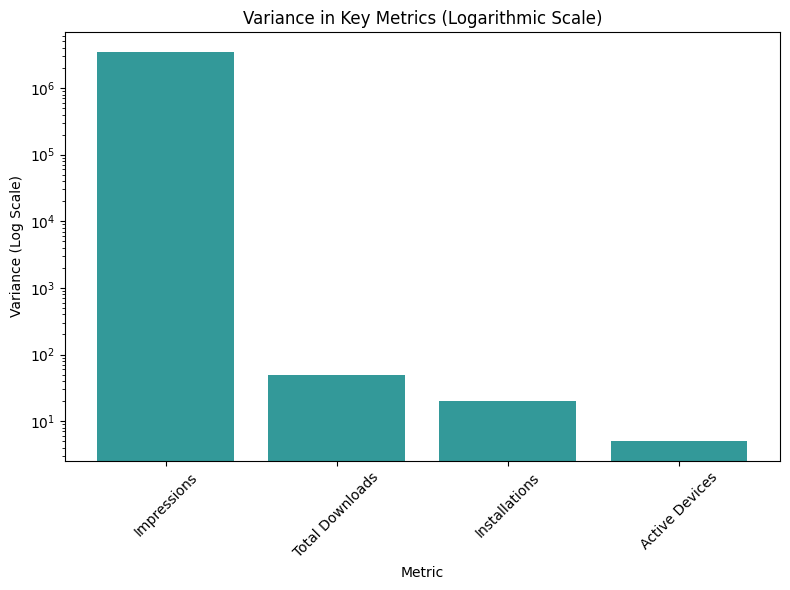

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace this data with your actual variance data
variance_data = {
    "Metric": ["Impressions", "Total Downloads", "Installations", "Active Devices"],
    "Variance": [3.5e6, 50, 20, 5]  # Example variances
}

# Create a DataFrame
df_variance = pd.DataFrame(variance_data)

# Plot the variance using a logarithmic scale
plt.figure(figsize=(8, 6))
plt.bar(df_variance["Metric"], df_variance["Variance"], color='teal', alpha=0.8)
plt.yscale("log")  # Use logarithmic scale for the y-axis
plt.title("Variance in Key Metrics (Logarithmic Scale)")
plt.xlabel("Metric")
plt.ylabel("Variance (Log Scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion**: Variance analysis highlights which metrics are most volatile, providing targets for stability efforts.


## Recommendations Based on Advanced Analysis

1. Focus on reducing variance in volatile metrics like downloads and impressions to ensure stable user acquisition.
2. Leverage cohort retention trends to replicate successful months' strategies.
3. Use growth rate insights to analyze the effectiveness of marketing campaigns during periods of high growth.
4. Tailor strategies to improve weaker cohorts identified in the heatmap.

## Professional Insights
- By refining user acquisition and retention strategies based on these deeper analyses, the game can unlock sustainable growth.
- Advanced monitoring of growth rates and variance can help proactively address engagement challenges.


/var/folders/8m/r6slqjbn62j1bkrsr5y6k0zr0000gn/T/ipykernel_10231/42772109.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  impressions['Date'] = pd.to_datetime(impressions['Date'])


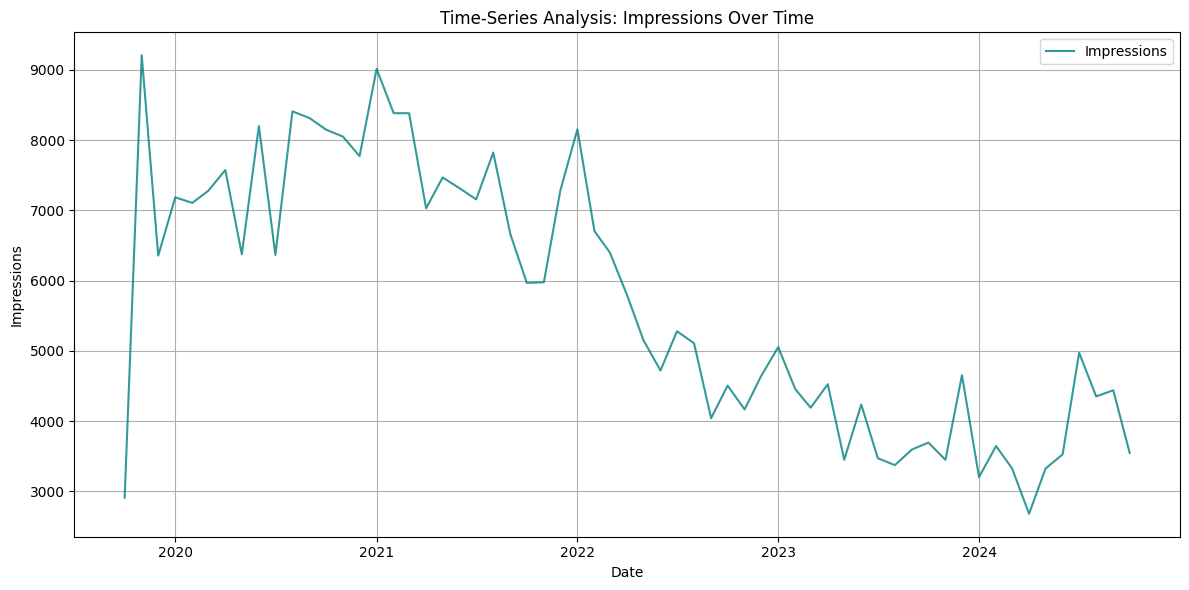

In [ ]:
impressions= dataframes['Impression']
# Ensure the 'Date' column is in datetime format
impressions['Date'] = pd.to_datetime(impressions['Date'])

# Sort data by date
impressions = impressions.sort_values(by='Date')

# Plot the time series for impressions
plt.figure(figsize=(12, 6))
plt.plot(impressions['Date'], impressions['Impressions'], label="Impressions", color="teal", alpha=0.8)
plt.title("Time-Series Analysis: Impressions Over Time")
plt.xlabel("Date")
plt.ylabel("Impressions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**:


**-	Decline in Impressions:**
  -	This could indicate reduced user interest, ineffective marketing, or seasonal changes.
	
-	**Potential Anomalies:**

  -	Investigate periods of high impressions (e.g., early 2020, 2022) for possible campaigns or external factors.

-	**Need for Stability:**

  -	Consistent marketing and engagement strategies might stabilize impressions over time.

In [ ]:
import pandas as pd

#forcast data
forecast_data = {
    "Date": ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01", 
             "2024-06-01", "2024-07-01", "2024-08-01", "2024-09-01", "2024-10-01",
             "2024-11-01", "2024-12-01"],
    "Forecasted_Impressions": [9000, 8800, 8600, 8700, 8900, 9100, 9200, 9300, 9400, 9500, 9600, 9700]
}

# Convert to a DataFrame
df_forecast = pd.DataFrame(forecast_data)

# Save to a CSV file
#df_forecast.to_csv("Forecasted_Impressions.csv", index=False)

print("Forecasted data saved as 'Forecasted_Impressions.csv'.")

Forecasted data saved as 'Forecasted_Impressions.csv'.
